
## Colorado Stream Flow Data

In [7]:
# Importing the necessary libraries
import dataretrieval.nwis as nwis
import pandas as pd
import matplotlib.pyplot as plt

### Fetching the data from the USGS NWIS via API call using the dataretrieval library

In [10]:
# FOUNTAIN CREEK AT PUEBLO, CO
# USGS URL: https://dashboard.waterdata.usgs.gov/api/gwis/2.1/service/site?agencyCode=USGS&siteNumber=07106500&open=211313

site = '07106500' # Fountain Creek at Pueblo, CO
display(nwis.get_record(sites=site, service='site')) # Site information

# get instantaneous values (iv)
df_fountain_creek = nwis.get_record(sites=site, service='dv', start='2009-01-01', end='2024-02-08').reset_index()

display(df_fountain_creek.head()) # Raw data

df_fountain_creek = df_fountain_creek[['datetime', '00060_Mean']]
df_fountain_creek.columns = ['datetime', 'daily_discharge_cfs']

df_fountain_creek['datetime'] = df_fountain_creek['datetime'].dt.date # Extracting date from datetime

# renameing datetime to date
df_fountain_creek = df_fountain_creek.rename(columns={'datetime': 'date'})

display(df_fountain_creek.head())

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,07106500,"FOUNTAIN CREEK AT PUEBLO, CO.",ST,381716,1043602,38.28778,-104.601085,M,F,...,Y,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,datetime,00010_Maximum,00010_Maximum_cd,site_no,00010_Minimum,00010_Minimum_cd,00010_Mean,00010_Mean_cd,00060_Mean,00060_Mean_cd,...,63680_Maximum,63680_Maximum_cd,63680_Minimum,63680_Minimum_cd,63680_Median,63680_Median_cd,80154_Mean,80154_Mean_cd,80155_Mean,80155_Mean_cd
0,2009-01-01 00:00:00+00:00,8.0,A,07106500,1.0,A,3.8,A,80.1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-02 00:00:00+00:00,8.2,A,07106500,2.7,A,4.9,A,79.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-03 00:00:00+00:00,5.7,A,07106500,1.3,A,3.3,A,82.6,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-04 00:00:00+00:00,2.6,A,07106500,0.5,A,1.5,A,87.2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-05 00:00:00+00:00,3.1,A,07106500,0.0,A,1.5,A,84.2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,date,daily_discharge_cfs
0,2009-01-01,80.1
1,2009-01-02,79.0
2,2009-01-03,82.6
3,2009-01-04,87.2
4,2009-01-05,84.2


#### Fountain Creek at Pueblo, CO Streamflow Data Analysis

In [17]:
# Summary of the data for Fountain Creek at Pueblo, CO
display(df_fountain_creek.describe())

,daily_discharge_cfs
count,5517.000000
mean,152.783902
std,275.654867
min,4.000000
25%,75.000000
50%,109.000000
75%,153.000000
max,6550.000000


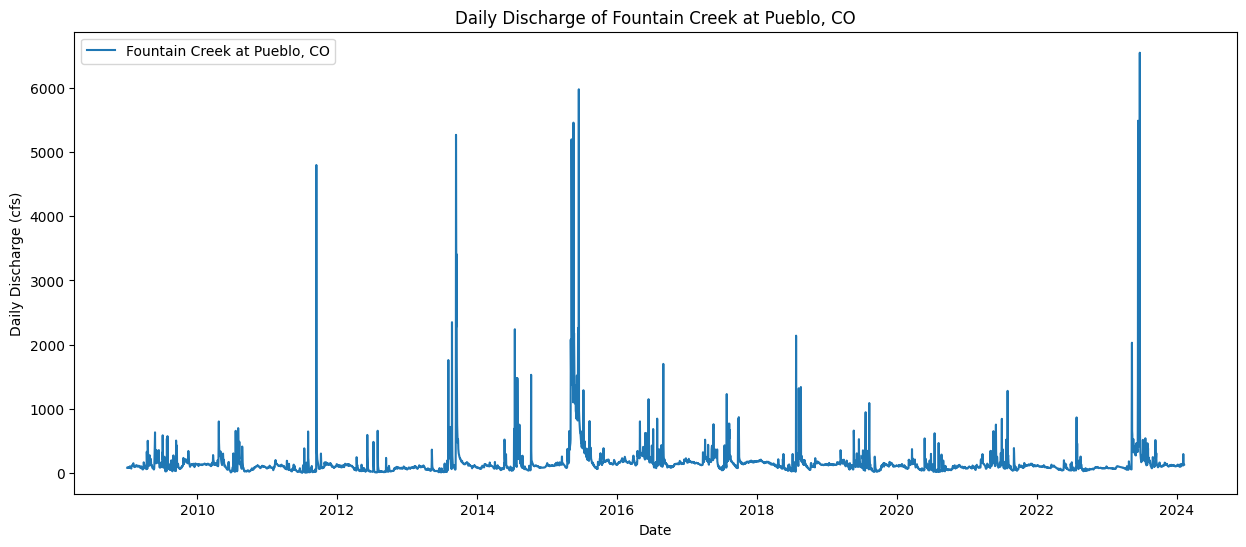

In [18]:
# Plotting time series of daily discharge for Fountain Creek at Pueblo, CO

plt.figure(figsize=(15, 6))
plt.plot(df_fountain_creek['date'], df_fountain_creek['daily_discharge_cfs'], label='Fountain Creek at Pueblo, CO')
plt.xlabel('Date')
plt.ylabel('Daily Discharge (cfs)')
plt.title('Daily Discharge of Fountain Creek at Pueblo, CO')
plt.legend()
plt.show()

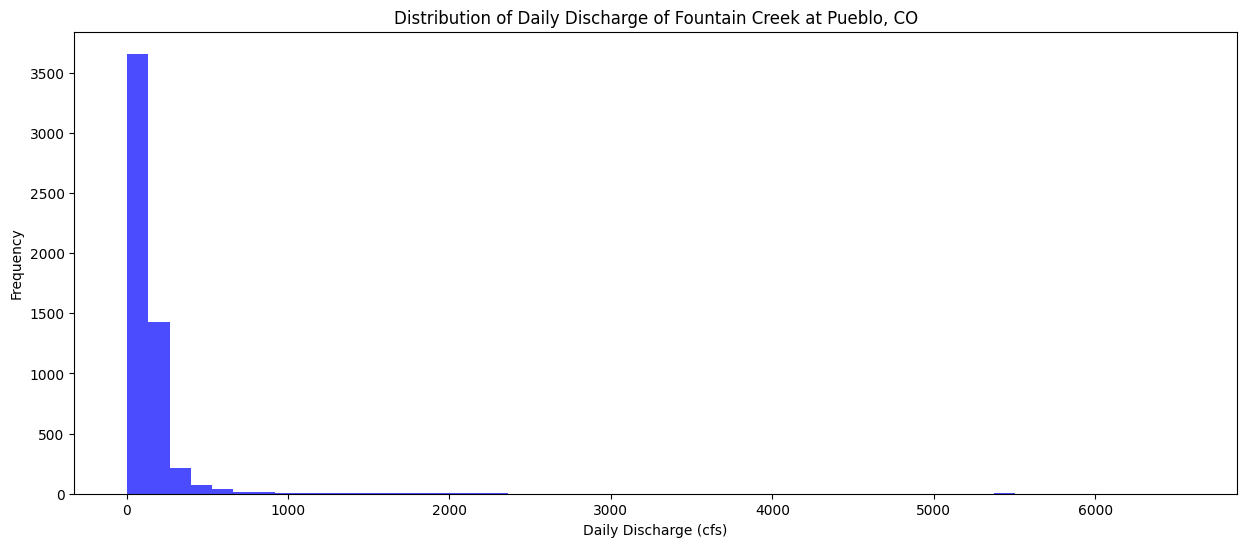

In [19]:
# Plotting distribution of daily discharge for Fountain Creek at Pueblo, CO

plt.figure(figsize=(15, 6))
plt.hist(df_fountain_creek['daily_discharge_cfs'], bins=50, alpha=0.7, color='blue')
plt.xlabel('Daily Discharge (cfs)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Discharge of Fountain Creek at Pueblo, CO')
plt.show()

In [20]:
# Saving the data to parquet files for reuse

df_fountain_creek.to_parquet('data/streamflow_data/fountain_creek.parquet')